In [1]:
%pylab inline
rcParams["font.size"] = 15

Populating the interactive namespace from numpy and matplotlib


## load data

In [2]:
import joblib
[params, spec_list] = joblib.load("/Users/cham/PycharmProjects/spectroscopy/stellar_parameters/demo_slam/slamplus_test_data.dump")

## Teff-logg distribution

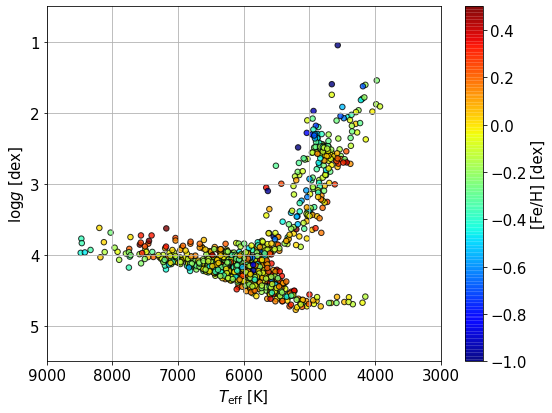

In [3]:
# Teff-logg
from astropy.table import Table
fig = figure(figsize(8, 6))
scatter(params["teff"], params["logg"], s=30, c=params["feh"], marker="o", edgecolors="k", alpha=.8, cmap=cm.jet, vmin=-1, vmax=0.5)
c = colorbar()
c.set_label("[Fe/H] [dex]")
grid(True)
xlim(9000, 3000)
ylim(5.5,0.5)
xlabel("$T_\mathrm{eff}$ [K]")
ylabel("$\log{g}$ [dex]")
fig.tight_layout()

## view spectra

Text(0, 0.5, 'Normalized Flux')

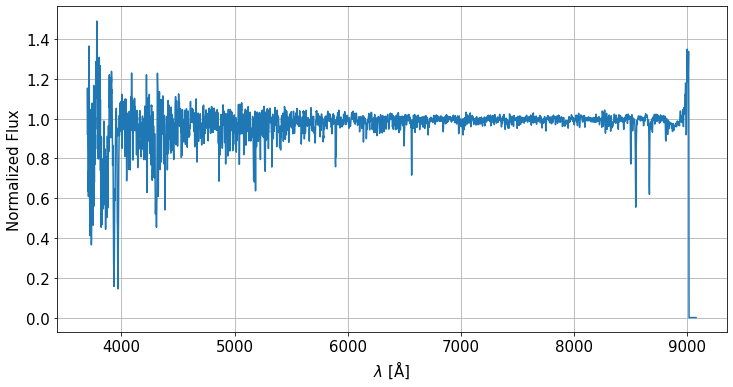

In [4]:
from laspec.mrs import MrsSpec
ms = spec_list[0]
fig = figure(figsize=(12, 6))
ms.plot_norm()
grid(True)
xlabel("$\lambda$ [$\mathrm{\AA}$]")
ylabel("Normalized Flux")

## normalize & interpolate spectra

In [5]:
# define wavelength
wave = np.arange(4000, 5800, 1.)
npix = len(wave)
nobs = len(params)
# interpolate spectra
flux_norm = np.array([np.interp(wave, ms.wave/(1+params["rv"][i]/299792.458), ms.flux_norm) for i,ms in enumerate(spec_list)])
ivar_norm = np.array([np.interp(wave, ms.wave/(1+params["rv"][i]/299792.458), ms.flux_norm_err**-2) for i,ms in enumerate(spec_list)])

## train SLAM+ (~10min, converge to mae=0.0232)

In [6]:
from laspec.slamplus import SlamPlus
# initialize slam plus (s)

from laspec.slamplus import SlamPlus
# initialize slam plus (s)
s = SlamPlus(flux_norm, np.array(params["teff", "logg", "feh"].to_pandas()), wave=wave)
# initialize NN model
s.initialize(nhidden=(100, 300))
# train the model and generate slam predictor (sp)
sp = s.train(loss="mae", batch_size=50, learning_rate=1e-4, epochs=10000, test_size=0.1,
             factor_reducelronplateau=0.5, patience_reducelronplateau=50, patience_earlystopping=50)

@NN: generating slam regressor with ninput=3
Current device is None 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               400       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               30300     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1800)              541800    
Total params: 572,500
Trainable params: 572,500
Non-trainable params: 0
_________________________________________________________________
@NN: Split data to training set [900] and test 

18/18 [==============================] - 1s 28ms/step - loss: 0.0423 - mse: 0.0052 - mae: 0.0423 - val_loss: 0.0433 - val_mse: 0.0053 - val_mae: 0.0433
Epoch 23/10000
18/18 [==============================] - 1s 29ms/step - loss: 0.0417 - mse: 0.0051 - mae: 0.0417 - val_loss: 0.0428 - val_mse: 0.0052 - val_mae: 0.0428
Epoch 24/10000
18/18 [==============================] - 1s 29ms/step - loss: 0.0410 - mse: 0.0050 - mae: 0.0410 - val_loss: 0.0420 - val_mse: 0.0051 - val_mae: 0.0420
Epoch 25/10000
18/18 [==============================] - 1s 33ms/step - loss: 0.0403 - mse: 0.0049 - mae: 0.0403 - val_loss: 0.0413 - val_mse: 0.0049 - val_mae: 0.0413
Epoch 26/10000
18/18 [==============================] - 1s 28ms/step - loss: 0.0397 - mse: 0.0047 - mae: 0.0397 - val_loss: 0.0408 - val_mse: 0.0048 - val_mae: 0.0408
Epoch 27/10000
18/18 [==============================] - 1s 29ms/step - loss: 0.0391 - mse: 0.0046 - mae: 0.0391 - val_loss: 0.0403 - val_mse: 0.0048 - val_mae: 0.0403
Epoch 28/1000

18/18 [==============================] - 1s 28ms/step - loss: 0.0296 - mse: 0.0033 - mae: 0.0296 - val_loss: 0.0307 - val_mse: 0.0033 - val_mae: 0.0307
Epoch 50/10000
18/18 [==============================] - 1s 30ms/step - loss: 0.0294 - mse: 0.0032 - mae: 0.0294 - val_loss: 0.0305 - val_mse: 0.0032 - val_mae: 0.0305
Epoch 51/10000
18/18 [==============================] - 1s 29ms/step - loss: 0.0291 - mse: 0.0032 - mae: 0.0291 - val_loss: 0.0302 - val_mse: 0.0032 - val_mae: 0.0302
Epoch 52/10000
18/18 [==============================] - 1s 30ms/step - loss: 0.0290 - mse: 0.0032 - mae: 0.0290 - val_loss: 0.0300 - val_mse: 0.0032 - val_mae: 0.0300
Epoch 53/10000
18/18 [==============================] - 1s 29ms/step - loss: 0.0288 - mse: 0.0031 - mae: 0.0288 - val_loss: 0.0298 - val_mse: 0.0031 - val_mae: 0.0298
Epoch 54/10000
18/18 [==============================] - 1s 32ms/step - loss: 0.0286 - mse: 0.0031 - mae: 0.0286 - val_loss: 0.0296 - val_mse: 0.0031 - val_mae: 0.0296
Epoch 55/1000

Epoch 77/10000
18/18 [==============================] - 0s 27ms/step - loss: 0.0260 - mse: 0.0027 - mae: 0.0260 - val_loss: 0.0270 - val_mse: 0.0026 - val_mae: 0.0270
Epoch 78/10000
18/18 [==============================] - 1s 31ms/step - loss: 0.0259 - mse: 0.0026 - mae: 0.0259 - val_loss: 0.0269 - val_mse: 0.0026 - val_mae: 0.0269
Epoch 79/10000
18/18 [==============================] - 1s 39ms/step - loss: 0.0258 - mse: 0.0026 - mae: 0.0258 - val_loss: 0.0269 - val_mse: 0.0026 - val_mae: 0.0269
Epoch 80/10000
18/18 [==============================] - 1s 29ms/step - loss: 0.0258 - mse: 0.0026 - mae: 0.0258 - val_loss: 0.0268 - val_mse: 0.0026 - val_mae: 0.0268
Epoch 81/10000
18/18 [==============================] - 1s 28ms/step - loss: 0.0257 - mse: 0.0026 - mae: 0.0257 - val_loss: 0.0267 - val_mse: 0.0026 - val_mae: 0.0267
Epoch 82/10000
18/18 [==============================] - 1s 31ms/step - loss: 0.0256 - mse: 0.0026 - mae: 0.0256 - val_loss: 0.0267 - val_mse: 0.0026 - val_mae: 0.026

Epoch 106/10000
18/18 [==============================] - 0s 28ms/step - loss: 0.0248 - mse: 0.0024 - mae: 0.0248 - val_loss: 0.0257 - val_mse: 0.0024 - val_mae: 0.0257
Epoch 107/10000
18/18 [==============================] - 0s 26ms/step - loss: 0.0247 - mse: 0.0024 - mae: 0.0247 - val_loss: 0.0257 - val_mse: 0.0024 - val_mae: 0.0257
Epoch 108/10000
18/18 [==============================] - 1s 38ms/step - loss: 0.0247 - mse: 0.0024 - mae: 0.0247 - val_loss: 0.0256 - val_mse: 0.0024 - val_mae: 0.0256
Epoch 109/10000
18/18 [==============================] - 0s 27ms/step - loss: 0.0247 - mse: 0.0024 - mae: 0.0247 - val_loss: 0.0256 - val_mse: 0.0024 - val_mae: 0.0256
Epoch 110/10000
18/18 [==============================] - 1s 28ms/step - loss: 0.0247 - mse: 0.0024 - mae: 0.0247 - val_loss: 0.0256 - val_mse: 0.0024 - val_mae: 0.0256
Epoch 111/10000
18/18 [==============================] - 0s 27ms/step - loss: 0.0246 - mse: 0.0024 - mae: 0.0246 - val_loss: 0.0256 - val_mse: 0.0024 - val_mae:

Epoch 135/10000
18/18 [==============================] - 0s 6ms/step - loss: 0.0242 - mse: 0.0023 - mae: 0.0242 - val_loss: 0.0251 - val_mse: 0.0023 - val_mae: 0.0251
Epoch 136/10000
18/18 [==============================] - 1s 38ms/step - loss: 0.0242 - mse: 0.0023 - mae: 0.0242 - val_loss: 0.0251 - val_mse: 0.0023 - val_mae: 0.0251
Epoch 137/10000
18/18 [==============================] - 1s 30ms/step - loss: 0.0242 - mse: 0.0023 - mae: 0.0242 - val_loss: 0.0250 - val_mse: 0.0023 - val_mae: 0.0250
Epoch 138/10000
18/18 [==============================] - 1s 29ms/step - loss: 0.0241 - mse: 0.0023 - mae: 0.0241 - val_loss: 0.0250 - val_mse: 0.0023 - val_mae: 0.0250
Epoch 139/10000
18/18 [==============================] - 0s 6ms/step - loss: 0.0241 - mse: 0.0023 - mae: 0.0241 - val_loss: 0.0251 - val_mse: 0.0023 - val_mae: 0.0251
Epoch 140/10000
18/18 [==============================] - 0s 27ms/step - loss: 0.0241 - mse: 0.0023 - mae: 0.0241 - val_loss: 0.0250 - val_mse: 0.0023 - val_mae: 0

Epoch 165/10000
18/18 [==============================] - 0s 6ms/step - loss: 0.0238 - mse: 0.0023 - mae: 0.0238 - val_loss: 0.0247 - val_mse: 0.0022 - val_mae: 0.0247
Epoch 166/10000
18/18 [==============================] - 0s 7ms/step - loss: 0.0238 - mse: 0.0023 - mae: 0.0238 - val_loss: 0.0246 - val_mse: 0.0022 - val_mae: 0.0246
Epoch 167/10000
18/18 [==============================] - 1s 29ms/step - loss: 0.0238 - mse: 0.0023 - mae: 0.0238 - val_loss: 0.0246 - val_mse: 0.0022 - val_mae: 0.0246
Epoch 168/10000
18/18 [==============================] - 1s 28ms/step - loss: 0.0238 - mse: 0.0023 - mae: 0.0238 - val_loss: 0.0246 - val_mse: 0.0022 - val_mae: 0.0246
Epoch 169/10000
18/18 [==============================] - 1s 38ms/step - loss: 0.0238 - mse: 0.0023 - mae: 0.0238 - val_loss: 0.0246 - val_mse: 0.0022 - val_mae: 0.0246
Epoch 170/10000
18/18 [==============================] - 0s 7ms/step - loss: 0.0237 - mse: 0.0023 - mae: 0.0237 - val_loss: 0.0246 - val_mse: 0.0022 - val_mae: 0.

18/18 [==============================] - 0s 8ms/step - loss: 0.0235 - mse: 0.0022 - mae: 0.0235 - val_loss: 0.0243 - val_mse: 0.0022 - val_mae: 0.0243
Epoch 197/10000
18/18 [==============================] - 1s 30ms/step - loss: 0.0235 - mse: 0.0022 - mae: 0.0235 - val_loss: 0.0243 - val_mse: 0.0022 - val_mae: 0.0243
Epoch 198/10000
18/18 [==============================] - 1s 29ms/step - loss: 0.0235 - mse: 0.0022 - mae: 0.0235 - val_loss: 0.0243 - val_mse: 0.0022 - val_mae: 0.0243
Epoch 199/10000
18/18 [==============================] - 0s 7ms/step - loss: 0.0235 - mse: 0.0022 - mae: 0.0235 - val_loss: 0.0243 - val_mse: 0.0022 - val_mae: 0.0243
Epoch 200/10000
18/18 [==============================] - 0s 8ms/step - loss: 0.0235 - mse: 0.0022 - mae: 0.0235 - val_loss: 0.0243 - val_mse: 0.0022 - val_mae: 0.0243
Epoch 201/10000
18/18 [==============================] - 1s 30ms/step - loss: 0.0234 - mse: 0.0022 - mae: 0.0234 - val_loss: 0.0243 - val_mse: 0.0022 - val_mae: 0.0243
Epoch 202/1

Epoch 230/10000
18/18 [==============================] - 1s 31ms/step - loss: 0.0232 - mse: 0.0022 - mae: 0.0232 - val_loss: 0.0240 - val_mse: 0.0021 - val_mae: 0.0240
Epoch 231/10000
18/18 [==============================] - 0s 8ms/step - loss: 0.0232 - mse: 0.0022 - mae: 0.0232 - val_loss: 0.0240 - val_mse: 0.0021 - val_mae: 0.0240
Epoch 232/10000
18/18 [==============================] - 1s 39ms/step - loss: 0.0232 - mse: 0.0022 - mae: 0.0232 - val_loss: 0.0240 - val_mse: 0.0021 - val_mae: 0.0240
Epoch 233/10000
18/18 [==============================] - 0s 8ms/step - loss: 0.0232 - mse: 0.0022 - mae: 0.0232 - val_loss: 0.0241 - val_mse: 0.0021 - val_mae: 0.0241
Epoch 234/10000
18/18 [==============================] - 0s 9ms/step - loss: 0.0232 - mse: 0.0022 - mae: 0.0232 - val_loss: 0.0240 - val_mse: 0.0021 - val_mae: 0.0240
Epoch 235/10000
18/18 [==============================] - 1s 32ms/step - loss: 0.0232 - mse: 0.0021 - mae: 0.0232 - val_loss: 0.0240 - val_mse: 0.0021 - val_mae: 0.

18/18 [==============================] - 1s 29ms/step - loss: 0.0230 - mse: 0.0021 - mae: 0.0230 - val_loss: 0.0238 - val_mse: 0.0021 - val_mae: 0.0238
Epoch 268/10000
18/18 [==============================] - 1s 31ms/step - loss: 0.0230 - mse: 0.0021 - mae: 0.0230 - val_loss: 0.0238 - val_mse: 0.0021 - val_mae: 0.0238
Epoch 269/10000
18/18 [==============================] - 1s 29ms/step - loss: 0.0230 - mse: 0.0021 - mae: 0.0230 - val_loss: 0.0238 - val_mse: 0.0021 - val_mae: 0.0238
Epoch 270/10000
18/18 [==============================] - 0s 6ms/step - loss: 0.0230 - mse: 0.0021 - mae: 0.0230 - val_loss: 0.0238 - val_mse: 0.0021 - val_mae: 0.0238
Epoch 271/10000
18/18 [==============================] - 1s 39ms/step - loss: 0.0230 - mse: 0.0021 - mae: 0.0230 - val_loss: 0.0238 - val_mse: 0.0021 - val_mae: 0.0238
Epoch 272/10000
18/18 [==============================] - 1s 31ms/step - loss: 0.0230 - mse: 0.0021 - mae: 0.0230 - val_loss: 0.0238 - val_mse: 0.0021 - val_mae: 0.0238
Epoch 273

Epoch 304/10000
18/18 [==============================] - 0s 7ms/step - loss: 0.0228 - mse: 0.0021 - mae: 0.0228 - val_loss: 0.0237 - val_mse: 0.0020 - val_mae: 0.0237
Epoch 305/10000
18/18 [==============================] - 0s 8ms/step - loss: 0.0228 - mse: 0.0021 - mae: 0.0228 - val_loss: 0.0237 - val_mse: 0.0020 - val_mae: 0.0237
Epoch 306/10000
18/18 [==============================] - 1s 30ms/step - loss: 0.0228 - mse: 0.0021 - mae: 0.0228 - val_loss: 0.0237 - val_mse: 0.0020 - val_mae: 0.0237
Epoch 307/10000
18/18 [==============================] - 1s 30ms/step - loss: 0.0228 - mse: 0.0021 - mae: 0.0228 - val_loss: 0.0237 - val_mse: 0.0020 - val_mae: 0.0237
Epoch 308/10000
18/18 [==============================] - 0s 8ms/step - loss: 0.0228 - mse: 0.0021 - mae: 0.0228 - val_loss: 0.0237 - val_mse: 0.0020 - val_mae: 0.0237
Epoch 309/10000
18/18 [==============================] - 0s 9ms/step - loss: 0.0228 - mse: 0.0021 - mae: 0.0228 - val_loss: 0.0237 - val_mse: 0.0020 - val_mae: 0.0

18/18 [==============================] - 1s 30ms/step - loss: 0.0227 - mse: 0.0021 - mae: 0.0227 - val_loss: 0.0236 - val_mse: 0.0020 - val_mae: 0.0236
Epoch 343/10000
18/18 [==============================] - 0s 7ms/step - loss: 0.0227 - mse: 0.0021 - mae: 0.0227 - val_loss: 0.0236 - val_mse: 0.0020 - val_mae: 0.0236
Epoch 344/10000
18/18 [==============================] - 0s 8ms/step - loss: 0.0227 - mse: 0.0021 - mae: 0.0227 - val_loss: 0.0236 - val_mse: 0.0020 - val_mae: 0.0236
Epoch 345/10000
18/18 [==============================] - 1s 30ms/step - loss: 0.0227 - mse: 0.0021 - mae: 0.0227 - val_loss: 0.0235 - val_mse: 0.0020 - val_mae: 0.0235
Epoch 346/10000
18/18 [==============================] - 0s 7ms/step - loss: 0.0227 - mse: 0.0021 - mae: 0.0227 - val_loss: 0.0236 - val_mse: 0.0020 - val_mae: 0.0236
Epoch 347/10000
18/18 [==============================] - 1s 32ms/step - loss: 0.0227 - mse: 0.0021 - mae: 0.0227 - val_loss: 0.0235 - val_mse: 0.0020 - val_mae: 0.0235
Epoch 348/1

18/18 [==============================] - 0s 9ms/step - loss: 0.0226 - mse: 0.0020 - mae: 0.0226 - val_loss: 0.0235 - val_mse: 0.0020 - val_mae: 0.0235
Epoch 382/10000
18/18 [==============================] - 0s 8ms/step - loss: 0.0226 - mse: 0.0020 - mae: 0.0226 - val_loss: 0.0235 - val_mse: 0.0020 - val_mae: 0.0235
Epoch 383/10000
18/18 [==============================] - 0s 7ms/step - loss: 0.0226 - mse: 0.0020 - mae: 0.0226 - val_loss: 0.0235 - val_mse: 0.0020 - val_mae: 0.0235
Epoch 384/10000
18/18 [==============================] - 1s 34ms/step - loss: 0.0226 - mse: 0.0020 - mae: 0.0226 - val_loss: 0.0235 - val_mse: 0.0020 - val_mae: 0.0235
Epoch 385/10000
18/18 [==============================] - 0s 8ms/step - loss: 0.0226 - mse: 0.0020 - mae: 0.0226 - val_loss: 0.0235 - val_mse: 0.0020 - val_mae: 0.0235
Epoch 386/10000
18/18 [==============================] - 0s 9ms/step - loss: 0.0226 - mse: 0.0020 - mae: 0.0226 - val_loss: 0.0235 - val_mse: 0.0020 - val_mae: 0.0235
Epoch 387/100

Epoch 423/10000
18/18 [==============================] - 0s 8ms/step - loss: 0.0225 - mse: 0.0020 - mae: 0.0225 - val_loss: 0.0234 - val_mse: 0.0020 - val_mae: 0.0234
Epoch 424/10000
18/18 [==============================] - 0s 8ms/step - loss: 0.0225 - mse: 0.0020 - mae: 0.0225 - val_loss: 0.0234 - val_mse: 0.0020 - val_mae: 0.0234
Epoch 425/10000
18/18 [==============================] - 0s 9ms/step - loss: 0.0225 - mse: 0.0020 - mae: 0.0225 - val_loss: 0.0234 - val_mse: 0.0020 - val_mae: 0.0234
Epoch 426/10000
18/18 [==============================] - 0s 9ms/step - loss: 0.0225 - mse: 0.0020 - mae: 0.0225 - val_loss: 0.0234 - val_mse: 0.0020 - val_mae: 0.0234
Epoch 427/10000
18/18 [==============================] - 0s 8ms/step - loss: 0.0225 - mse: 0.0020 - mae: 0.0225 - val_loss: 0.0234 - val_mse: 0.0020 - val_mae: 0.0234
Epoch 428/10000
18/18 [==============================] - 0s 8ms/step - loss: 0.0225 - mse: 0.0020 - mae: 0.0225 - val_loss: 0.0234 - val_mse: 0.0020 - val_mae: 0.023

18/18 [==============================] - 0s 10ms/step - loss: 0.0224 - mse: 0.0020 - mae: 0.0224 - val_loss: 0.0233 - val_mse: 0.0020 - val_mae: 0.0233
Epoch 465/10000
18/18 [==============================] - 0s 8ms/step - loss: 0.0224 - mse: 0.0020 - mae: 0.0224 - val_loss: 0.0233 - val_mse: 0.0020 - val_mae: 0.0233
Epoch 466/10000
18/18 [==============================] - 0s 8ms/step - loss: 0.0224 - mse: 0.0020 - mae: 0.0224 - val_loss: 0.0234 - val_mse: 0.0020 - val_mae: 0.0234
Epoch 467/10000
18/18 [==============================] - 0s 8ms/step - loss: 0.0224 - mse: 0.0020 - mae: 0.0224 - val_loss: 0.0234 - val_mse: 0.0020 - val_mae: 0.0234
Epoch 468/10000
18/18 [==============================] - 0s 8ms/step - loss: 0.0224 - mse: 0.0020 - mae: 0.0224 - val_loss: 0.0234 - val_mse: 0.0020 - val_mae: 0.0234
Epoch 469/10000
18/18 [==============================] - 0s 8ms/step - loss: 0.0224 - mse: 0.0020 - mae: 0.0224 - val_loss: 0.0234 - val_mse: 0.0020 - val_mae: 0.0234
Epoch 470/100

Epoch 510/10000
18/18 [==============================] - 0s 9ms/step - loss: 0.0223 - mse: 0.0020 - mae: 0.0223 - val_loss: 0.0233 - val_mse: 0.0020 - val_mae: 0.0233
Epoch 511/10000
18/18 [==============================] - 0s 7ms/step - loss: 0.0223 - mse: 0.0020 - mae: 0.0223 - val_loss: 0.0233 - val_mse: 0.0020 - val_mae: 0.0233
Epoch 512/10000
18/18 [==============================] - 1s 30ms/step - loss: 0.0223 - mse: 0.0020 - mae: 0.0223 - val_loss: 0.0233 - val_mse: 0.0020 - val_mae: 0.0233
Epoch 513/10000
18/18 [==============================] - 0s 9ms/step - loss: 0.0223 - mse: 0.0020 - mae: 0.0223 - val_loss: 0.0233 - val_mse: 0.0020 - val_mae: 0.0233
Epoch 514/10000
18/18 [==============================] - 0s 9ms/step - loss: 0.0223 - mse: 0.0020 - mae: 0.0223 - val_loss: 0.0233 - val_mse: 0.0020 - val_mae: 0.0233
Epoch 515/10000
18/18 [==============================] - 0s 9ms/step - loss: 0.0223 - mse: 0.0020 - mae: 0.0223 - val_loss: 0.0233 - val_mse: 0.0020 - val_mae: 0.02

Epoch 552/10000
18/18 [==============================] - 0s 9ms/step - loss: 0.0223 - mse: 0.0020 - mae: 0.0223 - val_loss: 0.0233 - val_mse: 0.0020 - val_mae: 0.0233
Epoch 553/10000
18/18 [==============================] - 0s 9ms/step - loss: 0.0223 - mse: 0.0020 - mae: 0.0223 - val_loss: 0.0233 - val_mse: 0.0020 - val_mae: 0.0233
Epoch 554/10000
18/18 [==============================] - 0s 8ms/step - loss: 0.0223 - mse: 0.0020 - mae: 0.0223 - val_loss: 0.0233 - val_mse: 0.0020 - val_mae: 0.0233
Epoch 555/10000
18/18 [==============================] - 0s 7ms/step - loss: 0.0223 - mse: 0.0020 - mae: 0.0223 - val_loss: 0.0233 - val_mse: 0.0020 - val_mae: 0.0233
Epoch 556/10000
18/18 [==============================] - 0s 8ms/step - loss: 0.0223 - mse: 0.0020 - mae: 0.0223 - val_loss: 0.0233 - val_mse: 0.0020 - val_mae: 0.0233
Epoch 557/10000
18/18 [==============================] - 0s 10ms/step - loss: 0.0223 - mse: 0.0020 - mae: 0.0223 - val_loss: 0.0233 - val_mse: 0.0020 - val_mae: 0.02

18/18 [==============================] - 0s 7ms/step - loss: 0.0223 - mse: 0.0020 - mae: 0.0223 - val_loss: 0.0233 - val_mse: 0.0020 - val_mae: 0.0233
Epoch 600/10000
18/18 [==============================] - 0s 8ms/step - loss: 0.0223 - mse: 0.0020 - mae: 0.0223 - val_loss: 0.0233 - val_mse: 0.0020 - val_mae: 0.0233
Epoch 601/10000
18/18 [==============================] - 0s 9ms/step - loss: 0.0223 - mse: 0.0020 - mae: 0.0223 - val_loss: 0.0233 - val_mse: 0.0020 - val_mae: 0.0233
Epoch 602/10000
18/18 [==============================] - 0s 8ms/step - loss: 0.0223 - mse: 0.0020 - mae: 0.0223 - val_loss: 0.0233 - val_mse: 0.0020 - val_mae: 0.0233
Epoch 603/10000
18/18 [==============================] - 0s 8ms/step - loss: 0.0223 - mse: 0.0020 - mae: 0.0223 - val_loss: 0.0233 - val_mse: 0.0020 - val_mae: 0.0233
Epoch 604/10000
18/18 [==============================] - 0s 9ms/step - loss: 0.0223 - mse: 0.0020 - mae: 0.0223 - val_loss: 0.0233 - val_mse: 0.0020 - val_mae: 0.0233
Epoch 605/1000

18/18 [==============================] - 0s 8ms/step - loss: 0.0223 - mse: 0.0020 - mae: 0.0223 - val_loss: 0.0233 - val_mse: 0.0020 - val_mae: 0.0233
Epoch 647/10000
18/18 [==============================] - 0s 8ms/step - loss: 0.0223 - mse: 0.0020 - mae: 0.0223 - val_loss: 0.0233 - val_mse: 0.0020 - val_mae: 0.0233
Epoch 648/10000
18/18 [==============================] - 0s 7ms/step - loss: 0.0223 - mse: 0.0020 - mae: 0.0223 - val_loss: 0.0233 - val_mse: 0.0020 - val_mae: 0.0233
Epoch 649/10000
18/18 [==============================] - 0s 8ms/step - loss: 0.0223 - mse: 0.0020 - mae: 0.0223 - val_loss: 0.0233 - val_mse: 0.0020 - val_mae: 0.0233
Epoch 650/10000
18/18 [==============================] - 0s 9ms/step - loss: 0.0223 - mse: 0.0020 - mae: 0.0223 - val_loss: 0.0233 - val_mse: 0.0020 - val_mae: 0.0233
Epoch 651/10000
18/18 [==============================] - 0s 9ms/step - loss: 0.0223 - mse: 0.0020 - mae: 0.0223 - val_loss: 0.0233 - val_mse: 0.0020 - val_mae: 0.0233
Epoch 652/1000

18/18 [==============================] - 0s 9ms/step - loss: 0.0223 - mse: 0.0020 - mae: 0.0223 - val_loss: 0.0233 - val_mse: 0.0020 - val_mae: 0.0233
Epoch 695/10000
18/18 [==============================] - 0s 9ms/step - loss: 0.0223 - mse: 0.0020 - mae: 0.0223 - val_loss: 0.0233 - val_mse: 0.0020 - val_mae: 0.0233
Epoch 696/10000
18/18 [==============================] - 0s 8ms/step - loss: 0.0223 - mse: 0.0020 - mae: 0.0223 - val_loss: 0.0233 - val_mse: 0.0020 - val_mae: 0.0233
Epoch 697/10000
18/18 [==============================] - 0s 8ms/step - loss: 0.0223 - mse: 0.0020 - mae: 0.0223 - val_loss: 0.0233 - val_mse: 0.0020 - val_mae: 0.0233
Epoch 698/10000
18/18 [==============================] - 0s 8ms/step - loss: 0.0223 - mse: 0.0020 - mae: 0.0223 - val_loss: 0.0233 - val_mse: 0.0020 - val_mae: 0.0233
Epoch 699/10000
18/18 [==============================] - 0s 10ms/step - loss: 0.0223 - mse: 0.0020 - mae: 0.0223 - val_loss: 0.0233 - val_mse: 0.0020 - val_mae: 0.0233
Epoch 700/100

## the learning curve

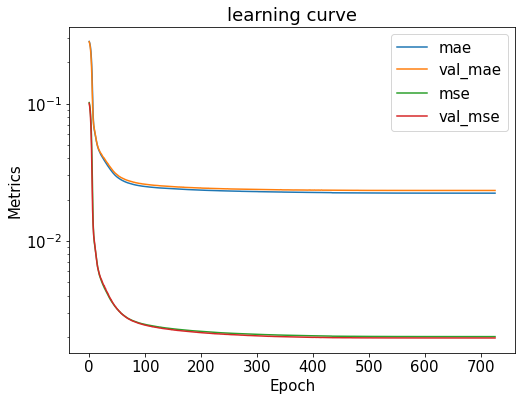

In [7]:
figure()
semilogy(s.history.history["mae"], label="mae")
semilogy(s.history.history["val_mae"], label="val_mae")
semilogy(s.history.history["mse"], label="mse")
semilogy(s.history.history["val_mse"], label="val_mse")
title("learning curve")
xlabel("Epoch")
ylabel("Metrics")
legend()

## fitting performance

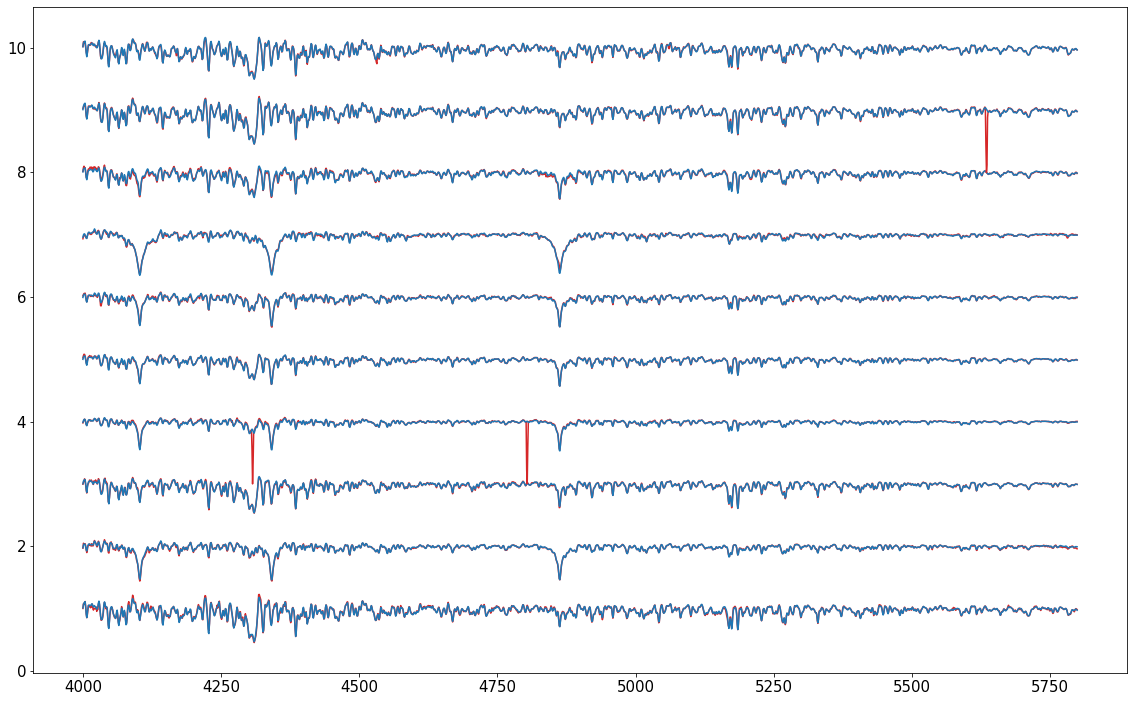

In [8]:
fig = figure(figsize=(16, 10))
for i in range(10):
    plot(sp.wave, s.tr_flux[i]+i, color="tab:red")
    plot(sp.wave, sp.predict_one_spectrum(s.tr_label[i])+i, color="tab:blue")
fig.tight_layout()

## speed

In [9]:
%%timeit
sp.predict_one_spectrum(s.tr_label[0])

2.36 ms ± 567 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## predict labels

In [10]:
from astropy.table import Table
xpred,_ = sp.curve_fit_multiple(s.tr_flux, method="trf", n_jobs=8)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    3.8s
[Parallel(n_jobs=8)]: Done  36 tasks      | elapsed:    5.0s
[Parallel(n_jobs=8)]: Done 106 tasks      | elapsed:    5.7s
[Parallel(n_jobs=8)]: Done 176 tasks      | elapsed:    6.4s
[Parallel(n_jobs=8)]: Done 266 tasks      | elapsed:    7.7s
[Parallel(n_jobs=8)]: Done 356 tasks      | elapsed:    9.2s
[Parallel(n_jobs=8)]: Done 466 tasks      | elapsed:   10.8s
[Parallel(n_jobs=8)]: Done 576 tasks      | elapsed:   12.2s
[Parallel(n_jobs=8)]: Done 706 tasks      | elapsed:   14.2s
[Parallel(n_jobs=8)]: Done 836 tasks      | elapsed:   15.8s
[Parallel(n_jobs=8)]: Done 932 tasks      | elapsed:   17.2s
[Parallel(n_jobs=8)]: Done 956 tasks      | elapsed:   17.7s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:   17.9s finished


## diagnal plot

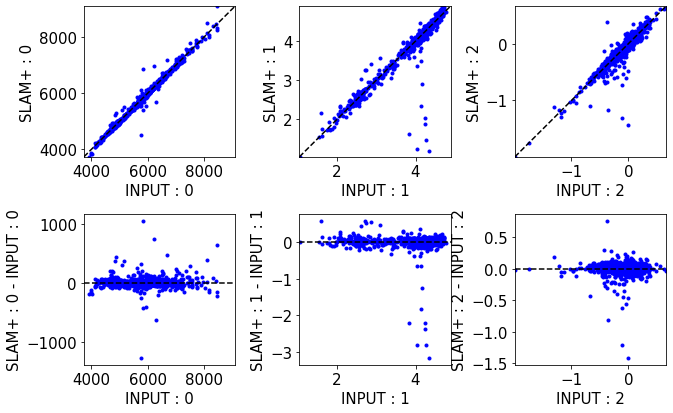

In [11]:
from slam.diagnostic import compare_labels
fig = compare_labels(s.tr_label, xpred, labelname1="INPUT", labelname2="SLAM+",)

In [15]:
from laspec.analysis import GA

xres = xpred-s.tr_label
ga_teff = GA(xres[:,0], np.arange(-1000, 1000, 10), initial_guess="auto", method="Nelder-Mead", robust=False)
print("Gaussian fitted sigam for Teff:", ga_teff.sigma)

ga_logg = GA(xres[:,1], np.arange(-2, 2, .05), initial_guess="auto", robust=False)
print("Gaussian fitted sigam for logg:", ga_logg.sigma)

ga_feh = GA(xres[:,2], np.arange(-2, 2, .05), initial_guess="auto", robust=False)
print("Gaussian fitted sigam for [Fe/H]:", ga_feh.sigma)

Gaussian fitted sigam for Teff: 32.829440227649215
Gaussian fitted sigam for logg: 0.05104312791002727
Gaussian fitted sigam for [Fe/H]: 0.044575759970636404
